In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [200]:
data_init = np.load('u_original_5.1_350.npy', allow_pickle=True)[::20,-1]

In [201]:
data = np.append(data_init, np.load('FNO_shockarray_5.1_20.npy', allow_pickle=True)[:,-1])

In [202]:
data_og = np.load('u_original_5.1_10000.npy', allow_pickle=True)[:,-1]

In [203]:
time = np.load('time_5.1_10000.npy', allow_pickle=True)[-1]

In [204]:
time_gap = time[::20]

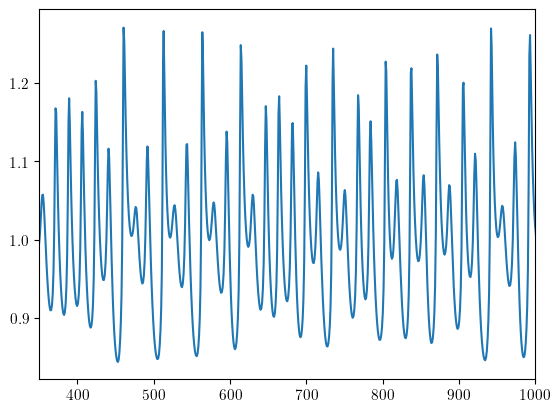

In [205]:
plt.plot(time_gap,data)
plt.xlim([350,1000])
plt.show()

In [206]:
from scipy import interpolate

tck = interpolate.splrep(time_gap, data, s = 0)

data = interpolate.splev(time, tck, der=0)

/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but recei

/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but recei

/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but recei

/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/s.aamir/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but recei

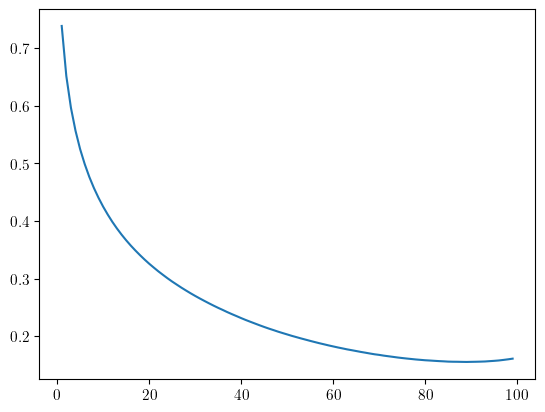

In [207]:
# Create a discrete signal from the continunous dynamics
hist, bin_edges = np.histogram(data, bins=400, density=True)
bin_indices = np.digitize(data, bin_edges)
data_discrete = data[bin_indices]

# find usable time delay via mutual information
tau_max = 100
mis = []

tau_to_use = None

for tau in range(1, tau_max):
    unlagged = data_discrete[:-tau]
    lagged = np.roll(data_discrete, -tau)[:-tau]
    joint = np.vstack((unlagged, lagged))

    mis.append(metrics.normalized_mutual_info_score(unlagged, lagged))

    if tau_to_use is None and len(mis) > 1 and mis[-2] < mis[-1]: # return first local minima
        tau_to_use = tau - 1
        # print(tau, mis)
        # break

# Print mutual information vs time delay
plt.plot(list(range(1, tau_max)), mis)
# Blocks until window is closed
plt.show()

In [209]:
tau_to_use 

150

In [91]:
data_lag0[7000:15000]

array([], dtype=float64)

In [402]:
from numpy import random

data_lag0 = data[:-2].flatten()
data_lag1 = np.roll(data, -tau_to_use)[:-2].flatten()
data_lag2 = np.roll(data, -2 * tau_to_use)[:-2].flatten()

data1_lag0 = data_og[7000:-2].flatten()
data1_lag1 = np.roll(data_og, -tau_to_use)[7000:-2].flatten()
data1_lag2 = np.roll(data_og, -2 * tau_to_use)[7000:-2].flatten()

data1nb_lag0 = data_og[7001:-2].flatten()
data1nb_lag1 = np.roll(data_og[7001:-2], -tau_to_use).flatten()
data1nb_lag2 = np.roll(data_og[7001:-2], -2 * tau_to_use).flatten()

# Plot time delay embedding
# fig = plt.figure(figsize=(30,20))
# ax = fig.add_subplot(111, projection='3d')

# start = 7000
# end = 30000
# random = int(random.uniform(start,end-3000))
# n = 80
# End = n + random
# period = 15
# # ax.plot3D(data_lag0[start:end], data_lag1[start:end], data_lag2[start:end], 'orange')
# # #ax.plot3D(data1_lag0[start:end], data1_lag1[start:end], data1_lag2[start:end], 'blue')
# # ax.scatter(data_lag0[random], data_lag1[random], data_lag2[random], 
# #                c='green', marker='o')
# # ax.scatter(data_lag0[random+period], data_lag1[random+period], data_lag2[random+period], c='red', marker='o')
# # ax.scatter(data_lag0[End], data_lag1[End], data_lag2[End], 
# #                c='green', marker='x')
# # ax.scatter(data_lag0[End+period], data_lag1[End+period], data_lag2[End+period], c='red', marker='x')


# # ax.set_title("Delay Reconstructed Chaotic Attractor",fontsize='large')
# # ax.set_xlabel(r'$x$',fontsize='large')
# # ax.set_ylabel(r'$y$',fontsize='large')
# # ax.set_zlabel(r'$z$',fontsize='large')

# # ax.view_init(40, 25)
# # plt.savefig('Chaotic Attractor.png')

(15000.0, 16000.0)

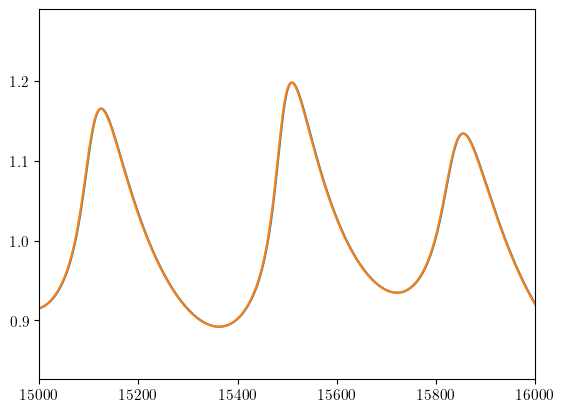

In [403]:
plt.plot(data1_lag0)
plt.plot(data1nb_lag0)
plt.xlim([15000,16000])

In [365]:
type(data_lag0)

numpy.ndarray

In [394]:
attractor = np.array([data1_lag0[15000:end],data1_lag1[15000:end],data1_lag2[15000:end]])
attractor_nb = np.array([data1nb_lag0[15000:end],data1nb_lag1[15000:end],data1nb_lag2[15000:end]])

In [398]:
from math import log
from numpy import linalg as LA
from numpy import random

#series = np.load('FNO_shockarray_5.1_20.npy', allow_pickle=True)[:,-1]
series = attractor[:,:]

N=1
#eps=input('Initial diameter bound: ')
N_dlist=[]
n=0 #number of nearby pairs found
s=[]
for i in range(N):
    p_i = int(random.uniform(0,10000))
    dlist = []
    for k in range(10000):
        dlist.append(np.sqrt((attractor_nb[0,p_i+k]-attractor[0,p_i+k])**2+(attractor_nb[1,p_i+k]-attractor[1,p_i+k])**2
                     +(attractor_nb[2,p_i+k]-attractor[2,p_i+k])**2))
        s.append(k)
    N_dlist.append(dlist)

In [399]:
dlist

[0.2419785589632483,
 0.24498627648029853,
 0.2478753584258624,
 0.2506602484709363,
 0.25335559584158124,
 0.25597623851774076,
 0.25853688529312163,
 0.26105187547674646,
 0.26353512721558997,
 0.2659998971418217,
 0.2684584774153897,
 0.27092231272191475,
 0.27340172670007895,
 0.27590551160642063,
 0.27844140831431496,
 0.2810155752908218,
 0.28363228532334656,
 0.2862947358046921,
 0.28900399943003385,
 0.2917595878692648,
 0.29455974615812236,
 0.2974002852827141,
 0.3002762381829347,
 0.3031809582115776,
 0.30610614522132934,
 0.30904305439628305,
 0.3119810072190013,
 0.31490923866857895,
 0.3178161679960432,
 0.32068941226790687,
 0.3235171178358504,
 0.32628635432599484,
 0.3289852661179793,
 0.3316018778951244,
 0.3341246999911007,
 0.33654326965377035,
 0.3388471321317762,
 0.34102753600028385,
 0.3430759484550626,
 0.34498532810033866,
 0.3467496599435187,
 0.3483637204376435,
 0.3498235824237906,
 0.3511258878413467,
 0.3522685930533171,
 0.35325050452047957,
 0.354071217

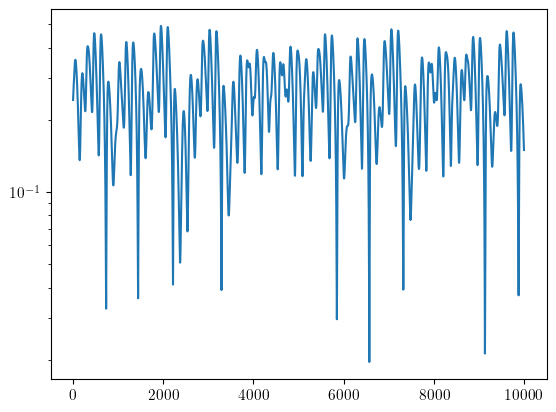

In [404]:
plt.semilogy(dlist)

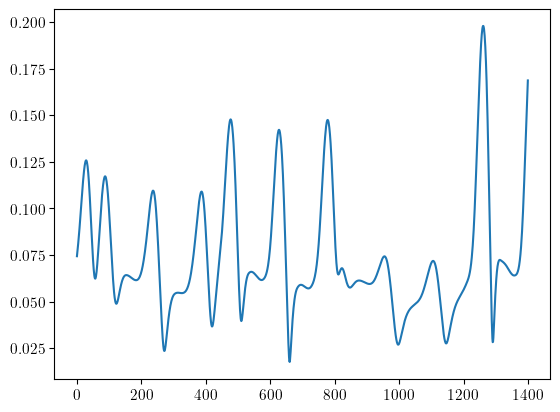

In [258]:
plt.plot(dlist)

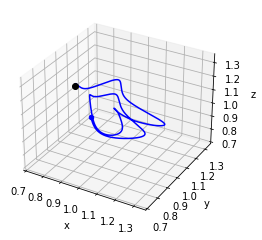

In [85]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

dataSet = np.array([data_lag0[7000:], data_lag1[7000:], data_lag2[7000:]])  

numDataPoints = 3000

def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(dataSet[0, :num+1], dataSet[1, :num+1], 
              dataSet[2, :num+1], c='blue')    # Updating Point Location 
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], 
               c='blue', marker='o')    # Adding Constant Origin
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],     
               c='black', marker='o')    # Setting Axes Limits
    ax.set_xlim3d([0.7, 1.35])
    ax.set_ylim3d([0.7, 1.35])
    ax.set_zlim3d([0.7, 1.35])

    # Adding Figure Labels
    #ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 #decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
# Plotting the Animation
fig = plt.figure(figsize=(30,20))
ax = plt.axes(projection='3d')
ax.view_init(40, 25)
line_ani = animation.FuncAnimation(fig, animate_func, interval=10,   
                                   frames=numDataPoints)
line_ani.save('animate.gif')

In [237]:
np.sum(N_dlist,0)

array([0.0539726 , 0.05403601, 0.05411334, 0.05420466, 0.05431165,
       0.0544355 , 0.05457683, 0.05473643, 0.05491392, 0.05511002,
       0.05532509, 0.05556037, 0.05581846, 0.0561017 , 0.05641295,
       0.05675507, 0.05713061, 0.05754265, 0.05799375, 0.05848642,
       0.05902384, 0.05960852, 0.06024315, 0.06093067, 0.06167348,
       0.06247431, 0.06333575, 0.06426014, 0.06525031, 0.06630844,
       0.06743667, 0.06863614, 0.06990267, 0.07123098, 0.07261524,
       0.07404927, 0.07552601, 0.07703683, 0.07857264, 0.08012431,
       0.08168271, 0.08323874, 0.08478343, 0.08630783, 0.08780318,
       0.08926082, 0.09067224, 0.09202905, 0.09332302, 0.09454607,
       0.09569028, 0.09674664, 0.09770239, 0.098544  , 0.09925817,
       0.09983186, 0.10025365, 0.10051764, 0.10061945, 0.1005551 ,
       0.10032083, 0.09991306, 0.09932839, 0.09856338, 0.09761513,
       0.09648099, 0.09515856, 0.09364559, 0.09194018, 0.09004089])

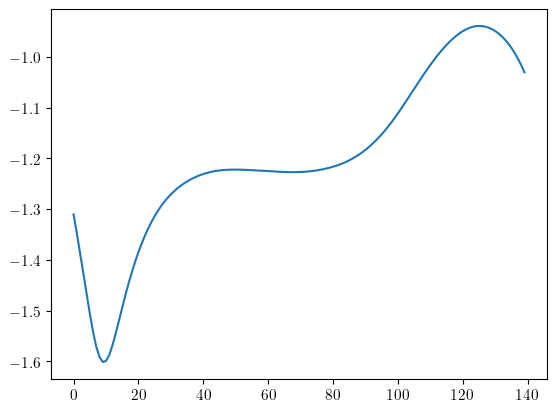

In [252]:
d = []
d_log = []
avg_d= np.sum(N_dlist,0)/N
for j in range(len(avg_d)):
    ph = avg_d[j]
    d_log.append(log(ph,10))
    
plt.plot(d_log)

In [253]:
xx = np.arange(10,60)

In [254]:
# assemble matrix A
A = np.vstack([xx, np.ones(len(xx))]).T

# turn y into a column vector
d_log = np.array(d_log[10:60])
d_log = d_log[:, np.newaxis]

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),d_log)
print(alpha)

[[ 0.00668467]
 [-1.53603573]]
